In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pingouin as pg # 검정통계량, 상관관계, 분산분석 등 
from statsmodels.formula.api import ols # 회귀분석

from matplotlib import font_manager,rc
font_path="AppleSDGothicNeoM.ttf" #파일 필요
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [39]:
n_aw = pd.read_excel('애월읍_중복제거_NAVER_ri포함.xlsx')
n_ss = pd.read_excel('성산읍_중복제거_NAVER_ri포함.xlsx')
g_aw = pd.read_excel('애월_음식점진짜중복제거.xlsx')
g_ss = pd.read_excel('성산_음식점진짜중복제거.xlsx')

# 네이버와 구글의 음식점 양상 파악하기 
## 분석대상 골라내기

In [40]:
# 읍 구분 없이 합치기 
naver = pd.concat([n_aw, n_ss], axis=0)
google = pd.concat([g_aw, g_ss], axis=0)
print(f'''
스크래핑 완료되어 중복제거한 데이터 수

네이버: {naver.name.count()}
구글: {google.name.count()}
''') 


스크래핑 완료되어 중복제거한 데이터 수

네이버: 1137
구글: 985



In [4]:
# 기본 조건에 맞는 음식점만 골라내기 
# naver = naver[(naver.visit_review >= 30) & (naver.blog_review >= 10)]
# naver = naver[naver.point.notna()]
# google = google[(google.review >= 30) & (google.score.notna())]

# naver = naver[naver.point.notna()]

print(f'''
네이버 방문자리뷰 30개 이상, 블로그리뷰 10개 이상
구글 방문자리뷰 30개 이상 

네이버: {naver.name.count()}
구글: {google.name.count()}
''')


네이버 방문자리뷰 30개 이상, 블로그리뷰 10개 이상
구글 방문자리뷰 30개 이상 

네이버: 1137
구글: 985



In [37]:
total = pd.merge(naver, google, on='name')
total.describe()

,point,visit_review,blog_review,score,review
count,407.000000,458.00000,466.000000,475.000000,475.000000
mean,4.423317,209.50655,195.040773,4.068842,105.867368
std,0.218644,401.27598,394.398451,0.606816,206.066889
min,3.680000,1.00000,1.000000,1.000000,1.000000
25%,4.280000,33.00000,13.250000,3.800000,11.000000
50%,4.410000,86.50000,59.500000,4.100000,49.000000
75%,4.560000,219.00000,197.500000,4.400000,125.500000
max,4.980000,3412.00000,3122.000000,5.000000,3096.000000


In [8]:
naver.visit_review.describe()

count    1074.000000
mean      163.509311
std       365.849218
min         1.000000
25%        15.000000
50%        58.000000
75%       158.500000
max      5459.000000
Name: visit_review, dtype: float64

In [7]:
naver.blog_review.sum()

160020.0

In [6]:
google.review.sum()

85348

In [76]:
q1 = naver.visit_review.quantile(0.25)
q3 = naver.visit_review.quantile(0.75)
IQR = q3 - q1
qq1 = q1 - 1.5*IQR # 보다 큰 값중 가장 작은 값
qq3 = q3 + 1.5*IQR # 보다 작은 값중 가장 큰 값 
qq1, qq3

(-415.5, 589.0)

In [71]:
q1_b = naver.blog_review.quantile(0.25)
q3_b = naver.blog_review.quantile(0.75)
IQR_b = q3_b - q1_b
qq1_b = q1_b - 1.5*IQR_b # 보다 큰 값중 가장 작은 값
qq3_b = q3_b + 1.5*IQR_b # 보다 작은 값중 가장 큰 값 
qq1_b, qq3_b

(-191.875, 333.125)

In [72]:
q1_g = google.review.quantile(0.25)
q3_g = google.review.quantile(0.75)
IQR_g = q3_g - q1_g
qq1_g = q1_g - 1.5*IQR_g # 보다 큰 값중 가장 작은 값
qq3_g = q3_g + 1.5*IQR_g # 보다 작은 값중 가장 큰 값 
qq1_g, qq3_g

(-134.0, 234.0)

In [ ]:
print(len(naver[(naver.visit_review < 373) & (naver.visit_review > 0)]))
print(len(naver[(naver.visit_review < 333) & (naver.visit_review > 0)]))
print(len(naver[(naver.visit_review < 233) & (naver.visit_review > 0)]))

In [5]:
# naver = naver[(naver.visit_review < 234) & (naver.blog_review < 234)]
# google = google[(google.review < 234)]


In [17]:
naver.head()

,name,point,visit_review,blog_review,ri,range
9,잇수다,4.36,87.0,180.0,고내리,4.2 - 4.39
10,제주화연이네식당,4.33,122.0,102.0,고내리,4.2 - 4.39
12,고내횟집,4.41,117.0,68.0,고내리,4.4 - 4.59
13,랑지다,4.39,60.0,104.0,고내리,4.2 - 4.39
16,뿔난돼지,4.66,130.0,47.0,고내리,4.6 - 4.79


In [18]:
google.head()

,name,score,review,address,range
0,The 돈,1.0,4,애월읍 신엄리 989-2,1.0 - 1.19
1,광성식당,1.0,1,애월읍 광령리 1333-6,1.0 - 1.19
2,구엄해녀의집,1.0,2,애월읍 구엄리,1.0 - 1.19
3,군성식당,1.0,1,애월읍 신엄리 2847-10번지 제주시,1.0 - 1.19
4,마루해물항아리,1.0,1,애월읍 하가로 167-2 하가리) 2층 2층,1.0 - 1.19


In [ ]:
naver['rate'] = naver.visit_review / naver.blog_review
naver.boxplot(column = 'rate', vert= False)
naver.describe()

In [ ]:
naver.rate.describe()

In [ ]:
naver[naver.rate > 30]

In [ ]:
# range달아주기 
review_list = [round(i, 2) for i in np.arange(1, 6000, 5)]   # 스코어 리스트 만들어주기
labels = [f'{i} - {round((i) + 4)}' for i in review_list[:-1]] # 라벨 만들기 
# labels[-1] = '4.8 - 5.0'
review_list
labels

In [ ]:
# 범위 달아주기 
naver['review_range'] = pd.cut(naver.visit_review, review_list, right=False, labels=labels)
naver

In [ ]:
naver[naver.review_range == '1 - 5'].plot.scatter(x='name', y='point')

In [ ]:
naver99 = naver.groupby('review_range').mean()
for i in np.arange(4, 5, 0.1):
    print(naver99[(naver99.point <= i+0.09) & (naver99.point > i)])

In [ ]:
naver99

In [ ]:
fig = sns.pairplot(naver[['review_range', 'point']])

In [ ]:
# 리뷰수 별 별점 평균 

naver.score.mean()
naver.boxplot(column = 'rate', vert= False)
naver.describe()

In [ ]:
google.info()

## 히스토그램을 위한 range

In [41]:
# range달아주기 
score_list = [round(i, 2) for i in np.arange(1, 5.2, 0.2)]   # 스코어 리스트 만들어주기
score_list2 = score_list + [0.19]
labels = [f'{i} - {round((i + 0.19), 2)}' for i in score_list[:-1]] # 라벨 만들기 
labels[-1] = '4.8 - 5.0'
score_list
labels

['1.0 - 1.19',
 '1.2 - 1.39',
 '1.4 - 1.59',
 '1.6 - 1.79',
 '1.8 - 1.99',
 '2.0 - 2.19',
 '2.2 - 2.39',
 '2.4 - 2.59',
 '2.6 - 2.79',
 '2.8 - 2.99',
 '3.0 - 3.19',
 '3.2 - 3.39',
 '3.4 - 3.59',
 '3.6 - 3.79',
 '3.8 - 3.99',
 '4.0 - 4.19',
 '4.2 - 4.39',
 '4.4 - 4.59',
 '4.6 - 4.79',
 '4.8 - 5.0']

In [49]:
# 범위 달아주기 
naver['range'] = pd.cut(naver.point, score_list, right=False, labels=labels)
google.range = pd.cut(google.score, score_list, right=False, labels=labels)

In [61]:
google.range[google.score == 5.0] = '4.8 - 5.0'
naver.range[naver.point == 5.0] = '4.8 - 5.0'

In [62]:
naver[naver.point == 5.0]

,name,point,visit_review,blog_review,ri,range
72,와썹비치하우스,5.0,34.0,11.0,곽지리,4.8 - 5.0
321,애월 우드나잇,5.0,11.0,2.0,애월리,4.8 - 5.0
208,팔미돈가 2호점,5.0,14.0,2.0,난산리,4.8 - 5.0


## 각종 기술통계 

In [26]:
print('네이버')
naver2 = naver.rename(columns={
    'point' : '네이버별점',
    'score' : '구글별점',
    'visit_review' : '네이버방문자리뷰',
    'review' : '구글방문자리뷰',
    'blog_review': '네이버블로그리뷰'
})
round(naver2.describe(),2)

네이버


,네이버별점,네이버방문자리뷰,네이버블로그리뷰
count,576.00,731.00,731.00
mean,4.44,59.45,37.37
std,0.24,55.64,50.45
min,3.48,1.00,1.00
25%,4.29,15.00,4.00
50%,4.43,41.00,14.00
75%,4.60,91.50,49.00
max,5.00,233.00,228.00


In [27]:
print('구글')
google2 = google.rename(columns={
    'point' : '네이버별점',
    'score' : '구글별점',
    'visit_review' : '네이버방문자리뷰',
    'review' : '구글방문자리뷰',
    'blog_review': '네이버블로그리뷰'
})
round(google2.describe(),2)

구글


,구글별점,구글방문자리뷰
count,889.00,889.00
mean,4.02,43.31
std,0.73,55.08
min,1.00,1.00
25%,3.80,3.00
50%,4.10,17.00
75%,4.50,66.00
max,5.00,233.00


In [28]:
naver_rename = naver.rename(columns = {
    'point' : "별점",
    'score' : "별점",
    'visit_review' : '방문자리뷰',
    'review' : '방문자리뷰'
})
google_rename = google.rename(columns = {
    'point' : "별점",
    'score' : "별점",
    'visit_review' : '방문자리뷰',
    'review' : '방문자리뷰'
})

In [29]:
describe = round(naver_rename.describe() - google_rename.describe(), 2)
print(f'''
네이버의 별점은 구글에 비해서 
평균 {describe.iloc[1,2]}점
중간값 {describe.iloc[5,2]}점 높다
''')


네이버의 별점은 구글에 비해서 
평균 0.43점
중간값 0.33점 높다



In [30]:
print('네이버 - 구글 차이')
describe[['별점', '방문자리뷰']]

네이버 - 구글 차이


,별점,방문자리뷰
count,-313.00,-158.00
mean,0.43,16.13
std,-0.49,0.56
min,2.48,0.00
25%,0.49,12.00
50%,0.33,24.00
75%,0.10,25.50
max,0.00,0.00


## 기술통계 시각화 박스플롯, 히스토그램

In [55]:
concatt = pd.concat([naver, google])
concatt = concatt.rename(columns={
    'point' : '네이버별점',
    'score' : '구글별점',
    'visit_review' : '네이버방문자리뷰',
    'review' : '구글방문자리뷰',
    'blog_review': '네이버블로그리뷰'
})
concatt.head()


,name,네이버별점,네이버방문자리뷰,네이버블로그리뷰,ri,range,구글별점,구글방문자리뷰,address
0,애월 우니담,4.33,979.0,715.0,고내리,4.2 - 4.39,NaN,NaN,NaN
1,제주 김만복 애월점,4.23,2182.0,1187.0,고내리,4.2 - 4.39,NaN,NaN,NaN
2,고불락,4.48,164.0,789.0,고내리,4.4 - 4.59,NaN,NaN,NaN
3,해오반,4.67,377.0,515.0,고내리,4.6 - 4.79,NaN,NaN,NaN
4,제주와함께라면,4.44,346.0,602.0,고내리,4.4 - 4.59,NaN,NaN,NaN


<AxesSubplot:>

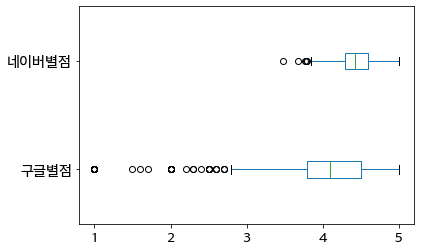

In [32]:
# concatt[['네이버별점', '구글별점']].plot.box(vert=False)
concatt.boxplot(column = ['구글별점', '네이버별점'], fontsize=15, vert=False, grid = False)

<AxesSubplot:>

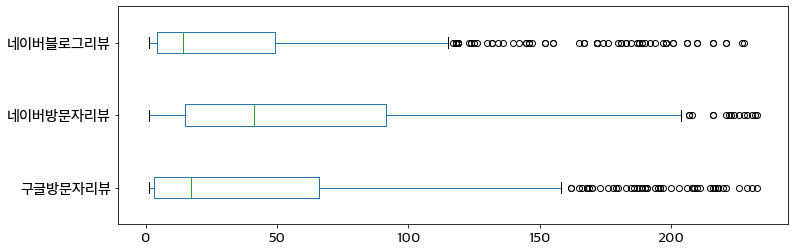

In [35]:
plt.figure(figsize=(12, 4))
concatt.boxplot(column = ['구글방문자리뷰', '네이버방문자리뷰', '네이버블로그리뷰'], fontsize=15, vert=False, grid=False)
# plt.show

<AxesSubplot:xlabel='별점 범위', ylabel='음식점수'>

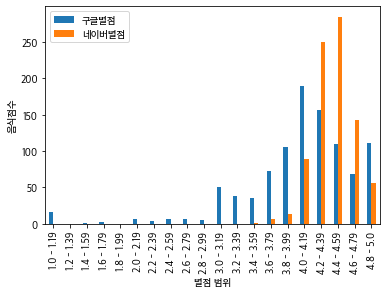

In [63]:
concatt.groupby('range')[['구글별점','네이버별점']].count().plot(kind='bar', xlabel='별점 범위', ylabel='음식점수' )

In [64]:
naver_count = naver.groupby('range')['point'].count().reset_index()
naver_count = naver_count.rename(columns = {
    "range" : "별점범위",
    "point" : "음식점수"
})
print('네이버')
naver_count['네이버비율'] = round((naver_count.음식점수 / 846 * 100), 2)
naver_count

네이버


,별점범위,음식점수,네이버비율
0,1.0 - 1.19,0,0.00
1,1.2 - 1.39,0,0.00
2,1.4 - 1.59,0,0.00
3,1.6 - 1.79,0,0.00
4,1.8 - 1.99,0,0.00
5,2.0 - 2.19,0,0.00
6,2.2 - 2.39,0,0.00
7,2.4 - 2.59,0,0.00
8,2.6 - 2.79,0,0.00
9,2.8 - 2.99,0,0.00


In [36]:
naver[naver.point >= 4.0].count() / 846

name            0.975177
point           0.975177
visit_review    0.963357
blog_review     0.953901
ri              0.975177
range           0.971631
dtype: float64

In [37]:
naver[naver.point >= 4.5].count() / 846

name            0.392435
point           0.392435
visit_review    0.391253
blog_review     0.386525
ri              0.392435
range           0.388889
dtype: float64

In [23]:
naver.describe()

,point,visit_review,blog_review
count,846.000000,1074.000000,1032.000000
mean,4.440083,163.509311,155.058140
std,0.230442,365.849218,362.465325
min,3.480000,1.000000,1.000000
25%,4.290000,15.000000,5.000000
50%,4.430000,58.000000,26.000000
75%,4.590000,158.500000,136.250000
max,5.000000,5459.000000,3330.000000


In [54]:
google_count = google.groupby('range')['score'].count().reset_index()
google_count = google_count.rename(columns = {
    "range" : "별점범위",
    "score" : "음식점수"
})
print('구글')
google_count['구글비율'] = round((google_count.음식점수 / 985) *100, 2)
google_count

구글


,별점범위,음식점수,구글비율
0,1.0 - 1.19,16,1.62
1,1.2 - 1.39,0,0.00
2,1.4 - 1.59,1,0.10
3,1.6 - 1.79,2,0.20
4,1.8 - 1.99,0,0.00
5,2.0 - 2.19,7,0.71
6,2.2 - 2.39,3,0.30
7,2.4 - 2.59,6,0.61
8,2.6 - 2.79,6,0.61
9,2.8 - 2.99,5,0.51


In [58]:
google[google.score >= 4.5].count() / 985

name       0.243655
score      0.243655
review     0.243655
address    0.243655
range      0.243655
dtype: float64

In [65]:
concattt = pd.concat([naver_count, google_count])
concattt.head()
concattt.

,별점범위,음식점수,네이버비율,구글비율
0,1.0 - 1.19,0,0.0,NaN
1,1.2 - 1.39,0,0.0,NaN
2,1.4 - 1.59,0,0.0,NaN
3,1.6 - 1.79,0,0.0,NaN
4,1.8 - 1.99,0,0.0,NaN


<AxesSubplot:>

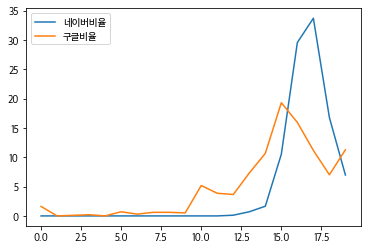

In [130]:
concattt[['별점범위', '네이버비율', '구글비율']].plot()

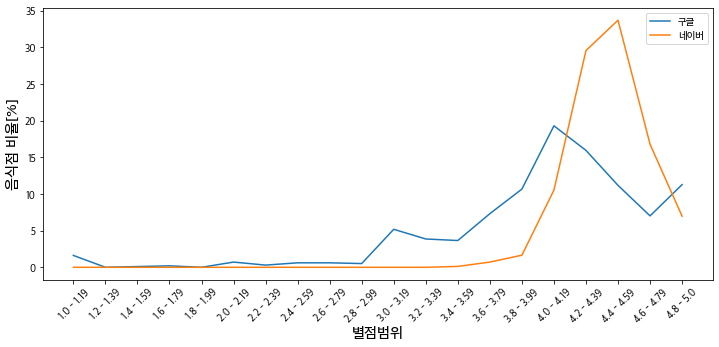

In [142]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


plt.figure(figsize = (12,5))
plt.plot(concattt['별점범위'], concattt['구글비율'], label='구글')
plt.plot(concattt['별점범위'], concattt['네이버비율'], label='네이버')
plt.xticks(rotation = 45)
plt.xlabel('별점범위', fontsize=15)
plt.ylabel('음식점 비율[%]', fontsize =15)
plt.legend()
plt.show()

## 별점과 리뷰의 분포도

<AxesSubplot:xlabel='point', ylabel='visit_review'>

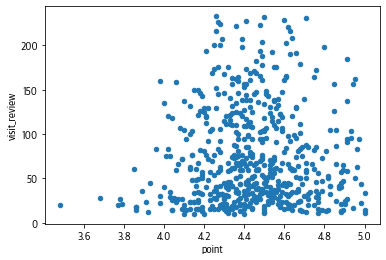

In [39]:
naver.plot.scatter(y='visit_review', x='point')

<AxesSubplot:xlabel='score', ylabel='review'>

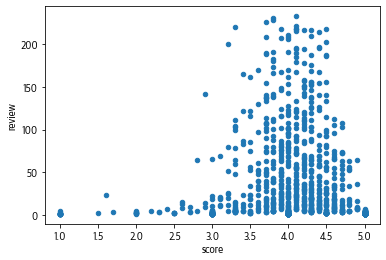

In [40]:
google.plot.scatter(y='review', x='score')

## 네이버 블로그리뷰와 방문자리뷰 간의 상관관계

<AxesSubplot:xlabel='blog_review', ylabel='visit_review'>

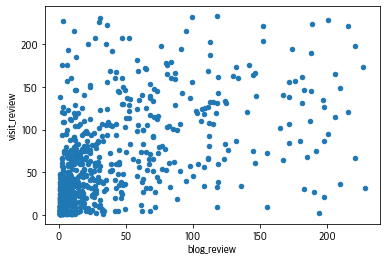

In [41]:
naver.plot.scatter(y='visit_review', x='blog_review')

In [44]:
pg.corr(naver.visit_review, naver.blog_review)

,n,r,CI95%,p-val,BF10,power
pearson,731,0.529071,"[0.47, 0.58]",5.775095e-54,3.22e+50,1.0


In [43]:
pg.ttest(naver.visit_review, naver.blog_review)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,7.947162,1460,two-sided,3.785569e-15,"[16.63, 27.53]",0.415689,1.195e+12,1.0


In [45]:
from statsmodels.formula.api import ols
m = ols ("visit_review ~ blog_review", data = naver).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           visit_review   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     283.4
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           5.78e-54
Time:                        17:24:15   Log-Likelihood:                -3854.5
No. Observations:                 731   AIC:                             7713.
Df Residuals:                     729   BIC:                             7722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.6431      2.175     17.305      0.000      33.373      41.913
blog_review     0.5835      0.035     16.834      0.000       0.515       0.652
==============================================================================
Omnibus:                      117.919   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.288
Skew:                           0.991   Prob(JB):                     4.36e-45
Kurtosis:                       4.668   Cond. No.                         78.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 임의 기준 설정 후 맛집찾기

In [143]:
star = 4.0
rev = 86

In [144]:
naver_top = naver[(naver.point >= star) & (naver.visit_review >= rev)]
print(f"""
네이버의 총 음식점 : {naver.name.count()} 개

별점 {star}이상 리뷰수 {rev}개 이상인 집 : {naver_top.name.count()} 개

총 음식점 대비 맛집 비율 : {round(naver_top.name.count()/naver.name.count(), 3)*100} % 
""")


네이버의 총 음식점 : 1137 개

별점 4.0이상 리뷰수 86개 이상인 집 : 423 개

총 음식점 대비 맛집 비율 : 37.2 % 



In [145]:
google_top = google[(google.score >= star) & (google.review >=rev)]
print(f"""
구글의 총 음식점 : {google.name.count()} 개

별점 {star}이상 리뷰수 {rev}개 이상인 집 : {google_top.name.count()} 개

총 음식점 대비 맛집 비율 : {round(google_top.name.count()/google.name.count(), 4)*100} % 
""")


구글의 총 음식점 : 985 개

별점 4.0이상 리뷰수 86개 이상인 집 : 169 개

총 음식점 대비 맛집 비율 : 17.16 % 



In [ ]:
naver[(naver.point >= 3.0) & (naver.point < 4.0) & (naver.visit_review >= 30) & (naver.blog_review >= 10)]

In [49]:
naver_top.describe()

,point,visit_review,blog_review
count,353.000000,353.000000,353.000000
mean,4.461416,103.951841,59.076487
std,0.211969,48.309436,56.580517
min,4.000000,43.000000,1.000000
25%,4.330000,63.000000,14.000000
50%,4.440000,94.000000,39.000000
75%,4.590000,135.000000,87.000000
max,4.980000,233.000000,227.000000


In [51]:
google_top.describe()

,score,review
count,197.000000,197.000000
mean,4.275127,106.974619
std,0.219090,50.529991
min,4.000000,43.000000
25%,4.100000,64.000000
50%,4.200000,95.000000
75%,4.400000,140.000000
max,4.900000,233.000000


In [ ]:
# 이름에 띄어쓰기 제거 : 띄어쓰기 때문에 합쳐지지 않는 것을 방지하기 위해서 
# 하지만 한개밖에 더 merge 되지 않아서 필요없을 듯 

n_aw['new_name'] = n_aw.name.str.replace(" ", "")
g_aw['new_name'] = g_aw.name.str.replace(" ", "")

# 블로그리뷰에서 방문자리뷰 빼기 
n_aw['reviewdiff'] = n_aw.blog_review - n_aw.visit_review

In [ ]:
print('네이버 애월 :', len(n_aw))
print('네이버 성산 :', len(n_ss))
print('구글 애월 :', len(g_aw))
print('구글 성산 :', len(g_ss))

In [ ]:
# 네이버 애월 : 별점 4.0 이상 + 방문자리뷰 100개 이상인 음식점 목록 
topnaw = n_aw[(n_aw['point'] >= 4.0) & (n_aw['visit_review'] >= 100)].sort_values('visit_review', ascending=False)
print(len(topnaw))
nottopn = n_aw[~((n_aw['point'] >= 4.0) & (n_aw['visit_review'] >= 100))].sort_values('visit_review', ascending=False)
print(len(nottopn))

In [ ]:
# 네이버 성산 : 별점 4.0 이상 + 방문자리뷰 100개 이상인 음식점 목록 
topnss = n_ss[(n_ss['point'] >= 4.0) & (n_ss['visit_review'] >= 100)].sort_values('visit_review', ascending=False)
len(topnss)

In [ ]:
# 구글 애월 86개 
topgaw = g_aw[(g_aw.score >= 4.0) & (g_aw.review > 100)].sort_values('review', ascending=False)

In [ ]:
# 구글 성산 65개 
topgss = g_ss[(g_ss.score >= 4.0) & (g_ss.review > 100)].sort_values('review', ascending=False)

In [ ]:
# 조건에 맞는 음식점만 머지 
# 정렬기준 : 구글 평점 -> 구글리뷰 순서 (그냥 보기 편하려고 했음)

awmerge = pd.merge(topnaw, topgaw, on='new_name').sort_values(['score', 'review'], ascending=False) 
print(len(awmerge), '개')
awmerge.head()

In [ ]:
# 머지한 테이블에서 : diff = 네이버평점-구글평점 
awmerge['diff'] = abs(awmerge.score - awmerge.point)

# 평균과 중간값 구하기. -> 별 차이 없음 
print(awmerge['diff'].mean())
print(awmerge['diff'].median())
awmerge

In [ ]:
awmerge.groupby('diff')['diff'].count().plot(kind='bar')

In [ ]:
# 조건 상관없이 원본을 바로 머지  
justmerge = pd.merge(n_aw, g_aw, on='new_name').sort_values(['score', 'review'], ascending=False) 

# no조건 머지한 테이블에서 : diff = 네이버평점-구글평점 
justmerge['diff'] = abs(justmerge.score - justmerge.point)

print(justmerge.new_name.count())
print(justmerge['diff'].mean()) 
print(justmerge['diff'].median()) 

In [ ]:
# no조건 머지한 테이블에서 : 아래 조건에 맞는 행만 : diff가 큰 순서대로 정렬 
condition = (justmerge.visit_review > 30) & (justmerge.review > 30) & (justmerge.visit_review < 2000)
diffaw = justmerge[condition].sort_values('diff', ascending=False)
diffaw

In [ ]:
topnaw[topnaw.new_name.str.contains('마마롱')]

In [ ]:
ols('visit_review ~ blog_review', n_aw).fit().summary()

In [ ]:
ols('blog_review ~ visit_review', n_aw).fit().summary()

In [ ]:
ols('point ~ visit_review + reviewdiff', n_aw).fit().summary()

In [ ]:
ols('point ~ reviewdiff', n_aw).fit().summary()

In [ ]:
ols('score ~ point', awmerge).fit().summary()

In [ ]:
pg.ttest(n_aw.point, g_aw.score)

In [ ]:
pg.ttest(topnaw.point, topgaw.score)

In [ ]:
pg.ttest(topnaw.visit_review, nottopn.visit_review)

In [ ]:
justmerge.point.mean()

In [ ]:
justmerge.score.mean()

In [ ]:
justmerge.point.median()

In [ ]:
justmerge.score.median()

In [ ]:
r30n = n_aw[n_aw['visit_review'] >= 30]
r30g = g_aw[g_aw['review'] >= 30]

In [ ]:
r30n.point.median()

In [ ]:
r30g.score.median()

In [ ]:
r30n.point.mean()

In [ ]:
r30g.score.mean()

In [ ]:
score_list = [i for i in range(0, 6000, 200)]
labels = [f'{i} - {i+199}' for i in score_list[:-1]]
labels

In [ ]:
n_aw.visit_review.max()

In [ ]:
n_ss.blog_review.max()

In [ ]:
n_aw['range'] = pd.cut(n_aw.visit_review, score_list, right=True, labels=labels)

In [ ]:
pp = n_aw.groupby('range')['name'].count().reset_index()
pp

In [ ]:
n_aw.groupby('range')['name'].count().plot(kind='bar')

In [ ]:
ols('diff ~ visit_review + blog_review', diffaw).fit().summary()

In [ ]:
ols('diff ~ reviewdiff', diffaw).fit().summary()

In [ ]:
pg.corr(diffaw['diff'], diffaw['reviewdiff'])

In [ ]:
awmerge